### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [1]:
import numpy as ny 
import pandas as pas   

import yfinance as yfe 

import seaborn as sn 
import matplotlib.pyplot as mplt   
%matplotlib inline 

In [2]:
stocks = input("Enter the code of the stock:- ") 
fact = yfe.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
fact.head()



Enter the code of the stock:- META
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200


In [3]:
fact.shape 

(2180, 5)

In [4]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2012-05-18 00:00:00-04:00 to 2021-01-15 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2180 non-null   float64
 1   High    2180 non-null   float64
 2   Low     2180 non-null   float64
 3   Close   2180 non-null   float64
 4   Volume  2180 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 102.2 KB


In [5]:
fact.describe()

,Open,High,Low,Close,Volume
count,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03
mean,124.748849,126.199771,123.246574,124.778660,3.208203e+07
std,68.546796,69.358285,67.728977,68.584527,2.853611e+07
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06
25%,71.237501,72.105001,70.177500,71.500000,1.618895e+07
50%,121.709999,122.740002,120.325001,121.549999,2.327860e+07
75%,178.000000,179.340004,176.259995,177.757500,3.767452e+07
max,300.160004,304.670013,293.049988,303.910004,5.735764e+08


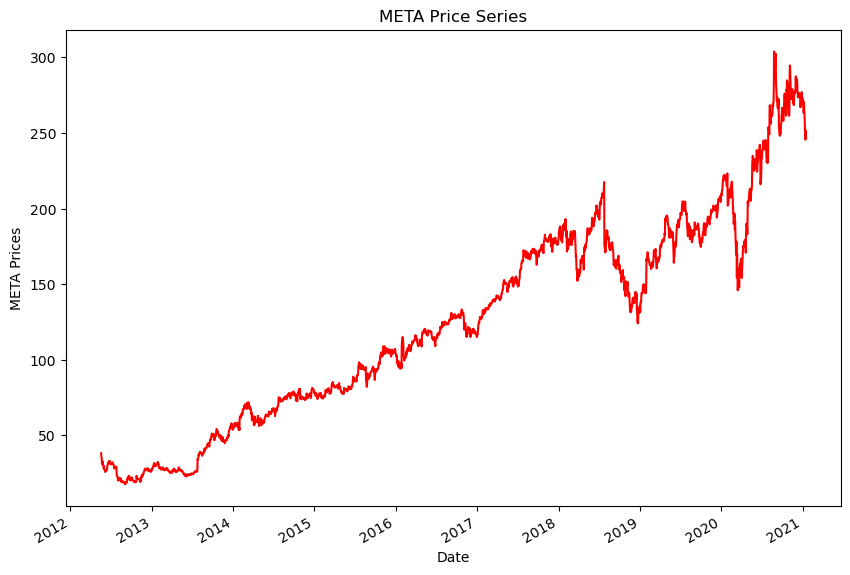

In [6]:
fact.Close.plot(figsize=(10, 7),color='r')
mplt.ylabel("{} Prices".format(stocks))
mplt.title("{} Price Series".format(stocks))
mplt.show()

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

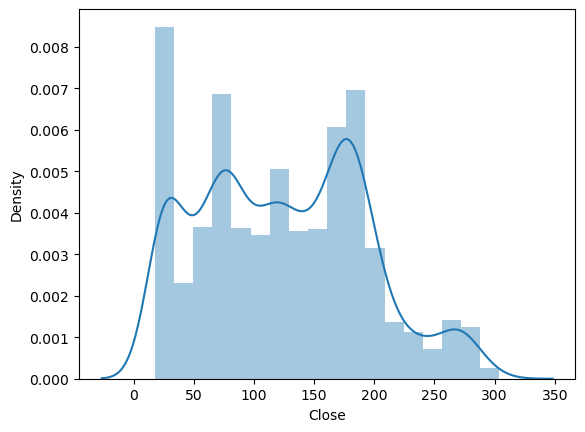

In [7]:
sn.distplot(fact["Close"])

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

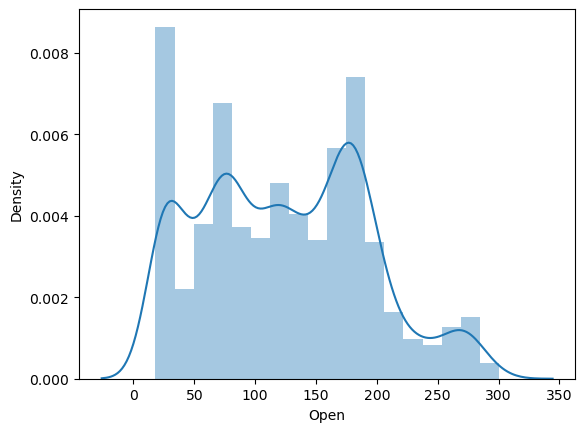

In [8]:
sn.distplot(fact["Open"])

C:\Users\laksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

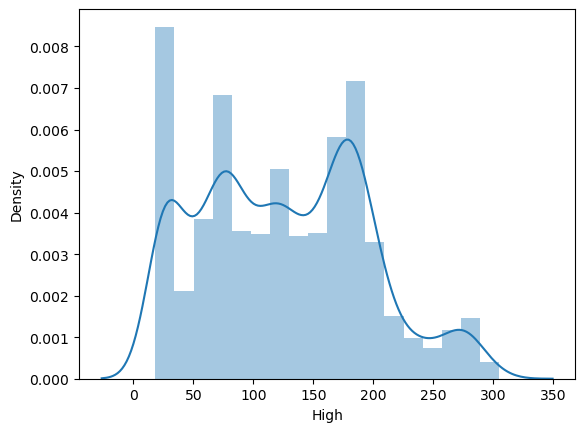

In [9]:
sn.distplot(fact["High"])

In [10]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = fact.drop("Close", axis=1) 
y = fact["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(1744, 4)
(436, 4)
(1744,)
(436,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [12]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = ny.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  1.1112828689766248
RMSE:-  1.0541740221503397
R2_score:-  0.9997742484581121


In [13]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\laksh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+03, tolerance: 8.102e+02
  model = cd_fast.enet_coordinate_descent(


In [14]:
calculate_metrics(y_test, la_p)

MSE:-  2.858548409662933
RMSE:-  1.690724226378428
R2_score:-  0.99941930022584


In [15]:
calculate_metrics(y_test, ri_p)

MSE:-  1.111232731312021
RMSE:-  1.0541502413375528
R2_score:-  0.9997742586433273


In [16]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.006 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.000 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.3s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   0.3s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.2s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.002 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.3s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.4s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.4s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.3s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.6s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.000 total time=   0.3s
[CV 4/5] END ...C=1000, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [ ]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [ ]:
def preprocess(Open,High,Low,Volume):
    test_data=ny.array([[Open,High,Low,Volume]])
    trained_model=joblib.load("model.pkl")
    prediction=trained_model.predict(test_data)
    return prediction
t=preprocess(148.54,153.19,147.39,26200000)
print("predicted value:",t)